# TensorBoard
TensorBoard是一个可视化工具，用于查看神经网络训练过程中的各种指标，如损失和准确率。TensorBoard还可以可视化计算图，以及在训练过程中的图像、音频和文本数据。TensorBoard是TensorFlow自带的工具，可以直接使用。同时也集成到了PyTorch中，可以通过PyTorch的接口使用TensorBoard。
在PyTorch框架中使用TensorBoard进行可视化和模型评估是一个很好的方式，可以帮助你更直观地理解模型的训练过程和性能。下面我会简要介绍如何在PyTorch中使用TensorBoard进行这些任务。

### 安装TensorBoard

首先，确保你已经安装了TensorBoard。如果还没有安装，可以通过pip安装：

```bash
pip install tensorboard
```

### 使用TensorBoard

1. **导入必要的库**

   在你的Python脚本或Jupyter笔记本中，首先导入必要的库：

   ```python
   import torch
   from torch.utils.tensorboard import SummaryWriter
   ```

2. **创建`SummaryWriter`实例**

   `SummaryWriter`是TensorBoard在PyTorch中的主要接口，用于记录和导出事件文件（包含日志信息）。你可以在你的代码中创建一个`SummaryWriter`实例：

   ```python
   writer = SummaryWriter('runs/你的实验名')
   ```

   这将创建一个目录（如果不存在的话），用于存储所有的TensorBoard日志文件。

3. **记录数据**

   在训练过程中，你可以使用`writer`来记录你感兴趣的信息，比如损失、准确率、特定层的权重和偏差等。这里有几个常用的函数：

   - `writer.add_scalar('标签', 数值, 步数)`：用于记录标量值，如损失或准确率。
   - `writer.add_histogram('标签', tensor, 步数)`：用于记录参数或梯度分布。
   - `writer.add_image('标签', 图像, 步数)`：用于记录图像数据，例如输入图像或特征图。
   - `writer.add_graph(model, 输入数据)`：用于可视化模型架构。

   例如，记录训练过程中的损失：

   ```python
   for epoch in range(num_epochs):
       for batch_idx, (data, targets) in enumerate(train_loader):
           # 运行你的训练步骤
           loss = train_step(data, targets)
           
           # 记录损失
           writer.add_scalar('训练损失', loss, epoch * len(train_loader) + batch_idx)
   ```

4. **启动TensorBoard**

   训练过程中或训练完成后，你可以通过命令行启动TensorBoard来查看记录的数据：

   ```bash
   tensorboard --logdir=runs
   ```

   然后按照命令行中显示的URL（通常是http://localhost:6006）在浏览器中打开TensorBoard界面。

5. **分析TensorBoard界面**

   在TensorBoard界面中，你可以看到不同的选项卡，如Scalars（标量）、Graphs（图结构）、Distributions（分布）等，用于查看不同类型的数据。

通过这些步骤，你可以在PyTorch中有效地使用TensorBoard来可视化训练过程和评估模型性能。这不仅可以帮助你理解模型在训练过程中的行为，还能帮助你发现潜在的问题和改进点。

在实际操作中，是否使用每个批次（batch）还是每个周期（epoch）来记录损失（loss）和准确率（accuracy），通常取决于你的具体需求和场景。以下是两种方法的一些考虑因素：

#### 每个批次记录（Batch-level Logging）：
- **细粒度观察**：记录每个批次的损失和准确率可以提供关于模型训练过程的更细粒度的视图。这对于识别和诊断训练过程中的问题非常有用，例如损失的波动或异常值。
- **快速反馈**：在训练的早期阶段，查看每个批次的性能可以更快地提供反馈，有助于快速调整超参数或早期发现问题。
- **大型数据集**：对于非常大的数据集，一个epoch可能需要很长时间才能完成。在这种情况下，按批次记录可以更频繁地了解模型性能。

#### 每个周期记录（Epoch-level Logging）：
- **趋势分析**：记录每个周期的平均损失和准确率可以提供关于模型性能随时间变化的整体趋势。这有助于评估模型是否在改进，以及它是否已经收敛。
- **简洁清晰**：每个周期记录生成的数据量少于每个批次记录，这使得趋势更易于观察和分析，尤其是在训练多个周期时。
- **资源效率**：记录和存储较少的数据点（每个周期的数据而不是每个批次的数据）可以降低存储和计算开销。

#### 综合考虑：
- 在实践中，两种方法可以根据需要结合使用。例如，你可以在训练初期按批次记录，以快速诊断和调整，然后在训练稳定后转为按周期记录，以减少日志数据量并集中关注长期趋势。
- 另外，也可以同时记录每个批次和每个周期的指标，但选择在TensorBoard中展示哪些数据，以便于分析和避免信息过载。

选择哪种方法取决于你的具体目标、数据集的大小以及训练过程中资源的可用性。在一些情况下，可能需要更频繁的反馈来快速调整模型，而在其他情况下，关注长期趋势可能更为重要。

### 示例：使用TensorBoard可视化LeNet-5训练过程
1. 定义`train`函数前，使用`SummaryWriter`创建一个`writer`实例：
   ```python
   writer = SummaryWriter('path')
   ```
2. 在`train`,`test`的循环中，添加`writer.add_scalar`记录训练和测试的损失和准确率：
   ```python
   # train
   for batch_idx, (data, target) in enumerate(train_loader):
       # 训练过程
       ...
       # batch logging
       writer.add_scalar('Training/Loss', loss.item(), epoch * len(train_loader) + batch_idx)
       writer.add_scalar('Training/Accuracy', accuracy(output, target), epoch * len(train_loader) + batch_idx)
   
    # test
    for batch_idx, (data, target) in enumerate(test_loader):
   
            # 测试过程
            ...
            # epoch logging
            writer.add_scalar('Test/Loss', loss.item(), epoch)
            writer.add_scalar('Test/Accuracy', accuracy(output, target), epoch)
            # batch logging  
            writer.add_scalar('Test/Loss batch', loss.item(), epoch * len(test_loader) + batch_idx)
            writer.add_scalar('Test/Accuracy batch', accuracy(output, target), epoch * len(test_loader) + batch_idx)
   

   ```

在TensorBoard中，确保每次训练运行时步数能够连续递增，或者为每次运行设置不同的`run`名称，你可以采取以下措施：

1. **为每次运行设置不同的`run`目录**：
   - 当你初始化`SummaryWriter`时，可以为每次运行指定不同的目录名。这样，TensorBoard会将每次运行视为不同的实验。
   ```python
   from torch.utils.tensorboard import SummaryWriter
   import datetime

   # 使用当前时间作为run的名称，确保每次都是唯一的
   current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
   writer = SummaryWriter('runs/experiment_' + current_time)
   ```

2. **确保步数连续递增**：
   - 如果你要在同一个`run`目录下继续之前的训练，你需要记录上次训练结束时的步数，并从该步数继续。
   - 通常，你可以在训练的每个epoch结束时保存模型的状态和当前的步数。当从检查点恢复时，加载这个步数并从它继续。
   ```python
   # 假设你已经有了一个检查点
   checkpoint = torch.load('path_to_checkpoint.pth')
   model.load_state_dict(checkpoint['model_state_dict'])
   optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
   start_epoch = checkpoint['epoch']
   global_step = checkpoint['global_step']

   for epoch in range(start_epoch, num_epochs):
       for batch_idx, (data, target) in enumerate(train_loader):
           # ...
           global_step += 1
           # 使用global_step作为步数
           writer.add_scalar('Training Loss', loss.item(), global_step)
           writer.add_scalar('Training Accuracy', accuracy(output, target), global_step)
   ```

   在这个例子中，`global_step`在所有epoch和batch之间保持连续。

采取这些措施可以帮助你在TensorBoard中清晰地区分不同的运行，并确保在一个运行内部，步数是单调递增的，从而避免图形显示问题。

In [2]:
from datetime import datetime
import numpy as np
import torch
import torch.nn as nn, torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [13]:
# LeNet-5示例
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        # 定义第卷积层C1, 输入通道为1，输出通道为6，卷积核大小为5(6个5x5的卷积核)
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        # 定义池化层S2，最大池化，窗口大小为2
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 定义第卷积层C3, 输入通道为6，输出通道为16，卷积核大小为5(16个5x5的卷积核)
        self.conv3 = nn.Conv2d(6, 16, kernel_size=5)
        # 定义池化层S4，最大池化，窗口大小为2
        self.max_pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        # 定义第卷积层C5，可以视为全连接层, 输入通道为16*5*5，输出通道为120。
        self.fc5 = nn.Linear(16 * 5 * 5, 120)
        # 定义全连接层F6，输入维度为120，输出维度为84
        self.fc6 = nn.Linear(120, 84)
        # 定义输出层，输入维度为84，输出维度为10
        self.fc7 = nn.Linear(84, 10)

    def forward(self, x):
        # 通过C1后使用ReLU激活函数
        x = F.relu(self.conv1(x))
        # 通过S2
        x = self.max_pool2(x)
        # 通过C3后使用ReLU激活函数
        x = F.relu(self.conv3(x))
        # 通过S4
        x = self.max_pool4(x)
        # 展平特征图
        # x.view(-1, 16*5*5) 这行代码的作用是将前面卷积层和池化层处理后的多维特征图展平为一维向量。这一步是必要的，因为全连接层（如 self.fc5）期望其输入是一维向量形式，而不是多维特征图。
        x = x.view(-1, 16 * 5 * 5)
        # 通过C5后使用ReLU激活函数
        x = F.relu(self.fc5(x))
        # 通过F6后使用ReLU激活函数
        x = F.relu(self.fc6(x))
        # 输出层
        x = self.fc7(x)
        return x


# 加载数据集
batch_size = 64

# MNIST 数据集的转换器，首先将数据转换为张量，然后标准化
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet-5 需要 32x32 的输入
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 下载并加载训练集
train_dataset = datasets.MNIST(root='C:\\Users\\yhb\\MscProject\\AI_TA\\data', train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 下载并加载测试集
test_dataset = datasets.MNIST(root='C:\\Users\\yhb\\MscProject\\AI_TA\\data', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 初始化 SummaryWriter
# 使用当前时间作为run的名称，确保每次都是唯一的
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
writer = SummaryWriter('runs/experiment_' + current_time)

# 计算准确率的函数
def accuracy(output, target):
    # 获取预测最高分的索引
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(target.view_as(pred)).sum().item()
    return correct / len(target)

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # 添加TensorBoard日志记录，传入正确的accuracy函数调用
        # 这里是batch logging，即每个batch结束后记录一次
        writer.add_scalar('Training/Loss', loss.item(), epoch * len(train_loader) + batch_idx)
        writer.add_scalar('Training/Accuracy', accuracy(output, target), epoch * len(train_loader) + batch_idx)
        
        if batch_idx % 100 == 0:
            print(
                f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

def test(model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target)

            test_loss += loss.item()
            
            # 分别使用epoch和epoch * len(test_loader) + batch_idx作为步数
            # step=epoch：每个epoch结束后记录一次
            # step=epoch * len(test_loader) + batch_idx：每个batch结束后记录一次
            
            # epoch logging，即每个epoch结束后记录一次
            writer.add_scalar('Test/Loss', loss.item(), epoch)
            writer.add_scalar('Test/Accuracy', accuracy(output, target), epoch)
            # batch logging
            writer.add_scalar('Test/Loss batch', loss.item(), epoch * len(test_loader) + batch_idx)
            writer.add_scalar('Test/Accuracy batch', accuracy(output, target), epoch * len(test_loader) + batch_idx)
            
            # 计算总的正确预测数
            correct += accuracy(output, target) * len(data)

    test_loss /= len(test_loader)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    # 添加总的测试准确率到TensorBoard
    # 这个准确率是整个测试集上的准确率，即每个epoch结束后的准确率
    writer.add_scalar('Average Test Accuracy', test_accuracy, epoch)
  
    print(f'\nTest set: Average loss: {test_loss:.4f}, Average Accuracy: {test_accuracy:.2f}%\n')

# 设置设备并实例化模型，定义损失函数和优化器，开始训练和测试
device = torch.device("cuda")
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters())

# 在模型定义后和训练开始前加入模型结构到TensorBoard
# 首先，需要创建一个示例输入张量，其大小与模型期望的输入匹配
input_tensor = torch.rand(1, 1, 32, 32).to(device)  # 1x1x32x32的张量，1代表批量大小，1代表颜色通道数

# 使用SummaryWriter的add_graph方法将模型和示例输入张量传入
writer.add_graph(model, input_tensor)

# 开始训练和测试
for epoch in range(1, 8): # 训练 15 次
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader, epoch)

# 关闭 SummaryWriter
writer.close()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.277568
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.194215
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.147743
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.130493
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.134002
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.033113
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.027772
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.071571
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.123747
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.048068

Test set: Average loss: 0.0662, Average Accuracy: 97.92%

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.185668
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.157774
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.024343
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.017256
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.198555
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.045483
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.116414
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.011551
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.015837
Tra

### 查看TensorBoard
在命令行中输入以下命令启动TensorBoard：
```bash
tensorboard --logdir=absolute_path_to_your_runs
```
然后在浏览器中打开TensorBoard界面，你将看到类似下面的界面：

注意，在使用`writer.add_scalar`记录损失和准确率时，第一个参数`tag`是用于标识这个数据的名称，tag一般格式为`'分类/名称'`，这样可以方便地在TensorBoard中查找和筛选数据。例如，`'Training/Loss'`表示训练过程中的损失，`'Test/Accuracy'`表示测试过程中的准确率。这样在web界面显示图像时，会根据父类进行分类，方便查看。

<img src="./images/img_29.png">

### writer.add_graph(model, input_tensor)
`writer.add_graph`方法用于将模型结构添加到TensorBoard中。它需要两个参数：模型和示例输入张量。示例输入张量的大小应该与模型期望的输入大小匹配。这个方法会在TensorBoard中添加一个名为“Graphs”的选项卡，用于查看模型的计算图。

提供的input_tensor不会用于实际的训练或推理，它仅仅是一个用于生成模型计算图的工具。因此，它的具体值并不重要，只要它的形状与模型期望的输入形状相匹配即可。在例子中，torch.rand(1, 1, 32, 32)生成了一个形状为[1, 1, 32, 32]的随机张量，这模拟了一个批量大小为1的单通道32x32像素的图像，这与LeNet模型期望的输入形状相匹配。

#### 使用方法
```python
# 在训练循环开始前，将模型结构添加到TensorBoard中即可
input_tensor = torch.rand(1, 1, 32, 32).to(device)  # 1x1x32x32的张量，1代表批量大小，1代表颜色通道数
writer.add_graph(model, input_tensor)
```

#### Graphs选项卡
<img src="./images/img_31.png">


输出为如上图所示的结构示意图。这个图显示了模型的计算图，包括每一层的输入和输出形状，以及每一层的参数数量。这个图可以帮助你更好地理解模型的结构和计算过程。

## 2. Plot 直接绘制Loss-Iteration曲线
Iteration指的是训练过程中的迭代次数，可以定义每10个batch记录一次，此时即每10个batch为一次iteration。

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.326469
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.542291
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.429899
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.461462
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.234466
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.137771
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.133822
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.148847
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.036641
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.159107
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.128853
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.118023
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.078259
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.027403
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.049969
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.035235
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.070401
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.146011
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.152953
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.103188
Train Epoch:

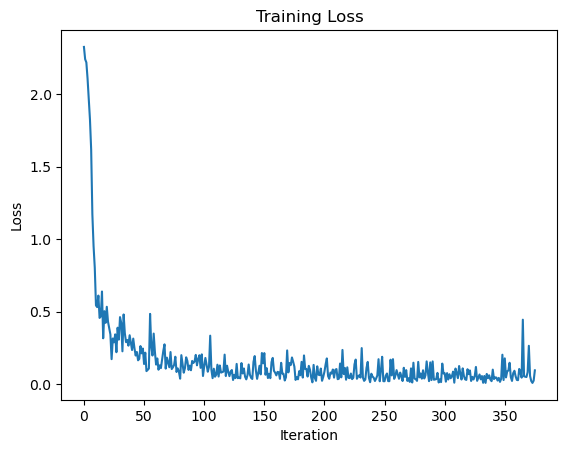

In [11]:
# 除了使用 SummaryWriter 记录损失之外，还可以直接通过return loss list的方式来记录损失，然后在训练结束后绘制损失曲线。

# 定义CNN模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# 加载MNIST数据集
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

# 下载并加载训练集
dataset = datasets.MNIST(root='C:\\Users\\yhb\\MscProject\\AI_TA\\data', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

def train(optimizer_name, model, device, train_loader, epochs=4):
    model.train()
    # 使用一个list来记录每个iteration的loss；
    # iteration是自定义的，可以设置每10个batch为一个iteration，即每10个batch记录一次loss
    loss_list = []
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            # 每训练10个batch存储一次loss(loss在每次训练都计算，但只有此时进行记录)
            # 即每个iteration表示10个batch，每10个batch记录一次loss
            if batch_idx % 10 == 0:
                loss_list.append(loss.item())
                
            # 每100个batch打印一次loss
            if batch_idx% 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
    return loss_list

# 初始化设备
device = torch.device("cuda")
train_model = Net().to(device)
optimizer = optim.SGD(train_model.parameters(), lr=0.01, momentum=0.5)
loss_list = train(optimizer, train_model, device, train_loader)

# 绘制损失曲线
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()